#Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#Dataset

The MNIST fashion dataset inclue in Keras  60,000 image data for training and 10,000 for testing data.

In [2]:
fashion_mnist= keras.datasets.fashion_mnist #loading dataset

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data() #split into training an testing data

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
type(train_images)

numpy.ndarray

Here, we have 60,000 images hat are 28x28 pixels.


In [5]:
train_images[0,23,23]

194

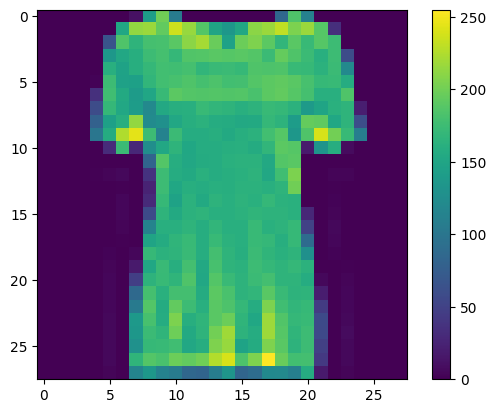

In [8]:
plt.figure() #create a figure
plt.imshow(train_images[10]) #show the figure
plt.colorbar() #colorbar on side
plt.grid(False)
plt.show() #show

#Data Preprocessing

Here all the greyscale values are between 0-255.
In this case,  will scale our values between 0 to 1, by dividing each value in training and testing datasets by 255.
Because smaller values will make it easier for the model to process data.

In [9]:
train_images= train_images/255
test_images= test_images/255

#Building The Model


We're going to use a keras sequential model with three different layers. This is a feed forward neural network(one that passes value from left to right). We'll break down each layer and it's architecture below.

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #input layer
    keras.layers.Dense(128,activation="relu"),  #hidden layer(128=number of neurons in the hidden layer, depends on the case but usually lesser than input layer)
    keras.layers.Dense(10, activation='softmax')#output layer(total classes, their probability[softmax gives value between 0-1])
])

#Compling the Model

In [13]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#Training the model

In [16]:
model.fit(train_images, train_labels,epochs=1) #for this given dataset, higher epoch was creating this model to overfit, the more it's seeing the same data, it's memorizing it

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2313 - accuracy: 0.9133


#Evaluating the Model

In [15]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8854
Test accuracy: 0.8853999972343445
